# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Comment
Author has to understand the data given and modify the data so that they are good for prediction models. Then several techniques of preparing prediction models should be applied so that it is clear which way gives the best results. Best models should be used to understand what features and what values of these features drive prices of cars up or down. Then conclusions for client should be made.

In [663]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Tasks
- Load the data from text file
- Understand which columns are cartegorical features and which are numeric
- Understand which features should be not used
- Get the number of NaN values for each feature

#### Conclusions 
- File is has a lot of rows - will have to use part of records in some cases
- Most of features ar categorical - will have to use OneHotEncoder to encode these features
- Will not use features:
      a)"id" - not usefull,
      b) "VIN" - not usefull,
      c) "model" - to many different values,
      d) "region" - we could use if we knew where the client is,
      e) "state" - we could use if we knew where the client is.
- A lot of NaN values - will have to take separeate approach for different columns:
    a) Numeric columns "year" and "odometer" - remove records with "NaN" values in these columns
    b) Categorical features - will leave as it is - value NaN will be sepearate category
- There are wrong values in numerical columns

#### Code with comments bellow

In [664]:
filename = 'data/vehicles.csv'
df = pd.read_csv(filename)

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [666]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


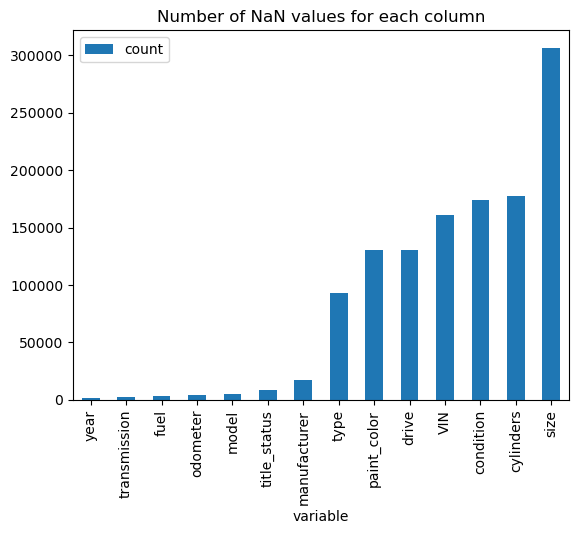

In [667]:
#Check for NaN values
df1  = df.melt()
#df11 = df1.groupby('variable').size().reset_index()[['variable']]
df1 = df1[df1['value'].isna()]
df1 = df1.groupby('variable')[['variable']].value_counts().reset_index().sort_values(by='count', ascending=True)
#df2 = pd.merge(df11, df1, on = 'variable', how='left')
df2 = df1
df2['count'] = df2['count'].fillna(0)
df2 = df2.sort_values(by='count', ascending=True)
df2.plot(kind='bar', x="variable", y="count")
plt.title("Number of NaN values for each column")
plt.show()

In [668]:
#Get value information for each column
for col in df.columns:
    print(df[col].value_counts(dropna=False))
    print()    

id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Tasks
- Make a copy of dataset for data preperation
- Remove features which will not be used
- Remove NaN values for features "year" and "odometer"
- Make histograms for numeric values to understand distribution
- Remove outlieries if any for numeric columns
- Create training and development indices and alos training and development data sets
- Use OneHotEncoder on training set to understand the number of featues after categorical feature encoding

#### Code - create copy of df, drop not needed features and remove NaNs for two numerci columns

In [669]:
#Drop NaN values from float features "year" and "odometer" and make a copy of dataset
df_prep = df.dropna(subset=["year", "odometer"]).copy()

In [670]:
df_prep.drop(columns=['id', 'VIN', 'region', 'model', 'state'], inplace=True)

In [671]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421344 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         421344 non-null  int64  
 1   year          421344 non-null  float64
 2   manufacturer  405077 non-null  object 
 3   condition     250851 non-null  object 
 4   cylinders     246585 non-null  object 
 5   fuel          419172 non-null  object 
 6   odometer      421344 non-null  float64
 7   title_status  413986 non-null  object 
 8   transmission  419649 non-null  object 
 9   drive         292495 non-null  object 
 10  size          119732 non-null  object 
 11  type          329562 non-null  object 
 12  paint_color   293254 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 45.0+ MB


#### Code - value distribution of numeric columns

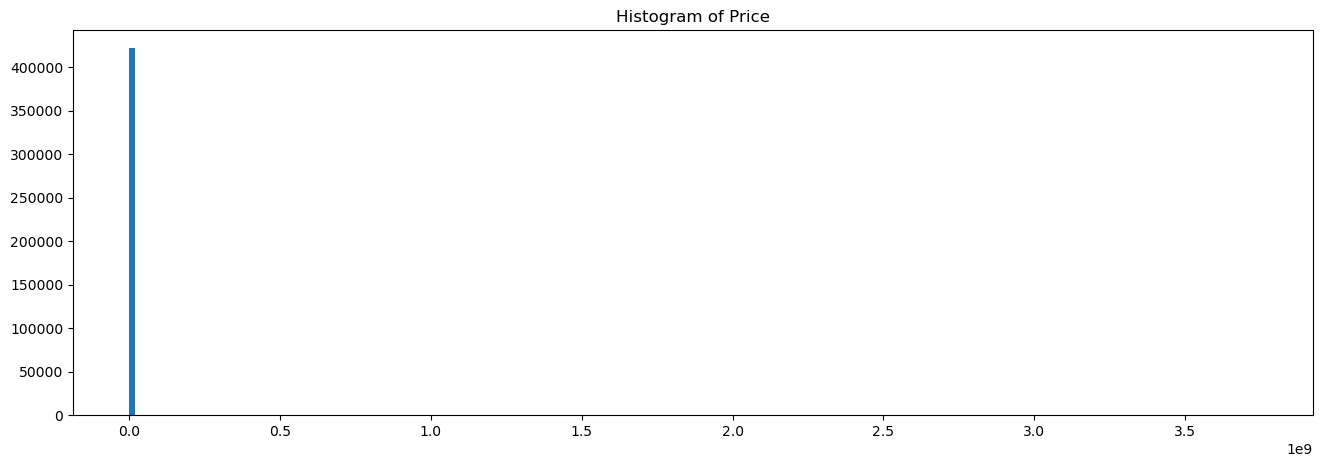

In [672]:
plt.figure(figsize=(16,5))
plt.hist(df_prep['price'], bins=200)
plt.title('Histogram of Price')
plt.show()

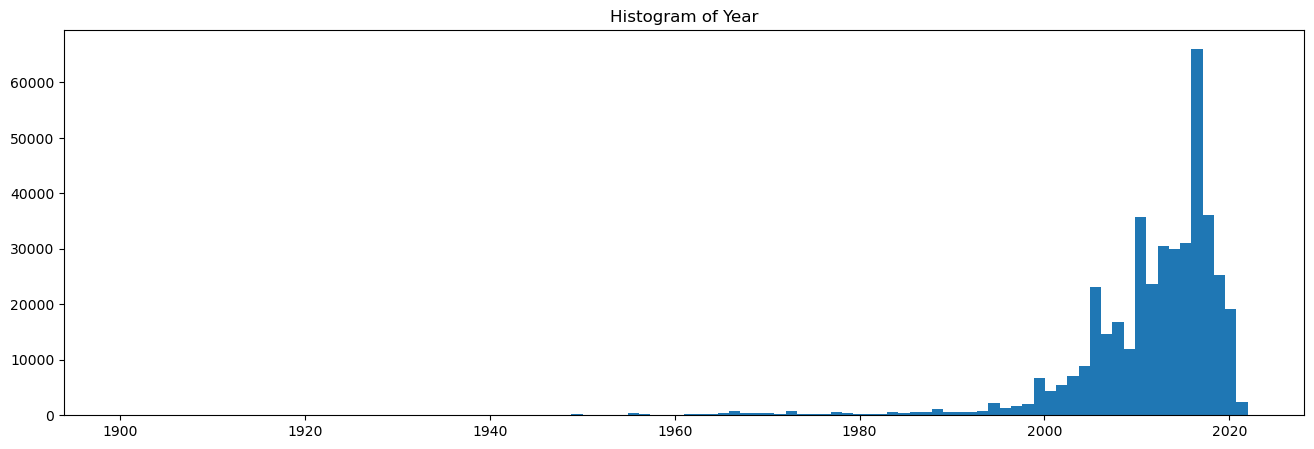

In [673]:
plt.figure(figsize=(16,5))
plt.hist(df_prep['year'], bins=100)
plt.title('Histogram of Year')
plt.show()

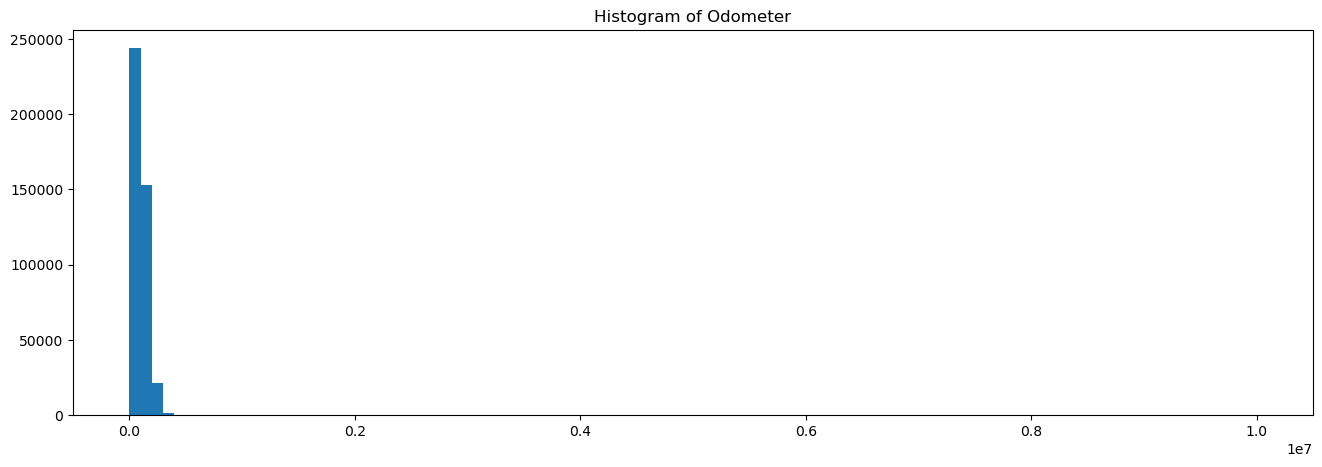

In [674]:
plt.figure(figsize=(16,5))
plt.hist(df_prep['odometer'], bins=100)
plt.title('Histogram of Odometer')
plt.show()

#### Code - deal with outlieres in "price", "year" and "odometer" columns

In [675]:
#find outlieres
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - distance*IQR
    upper_boundary = df[variable].quantile(0.75) + distance*IQR
    return lower_boundary, upper_boundary

In [676]:
#Finding Outliers in "price" column using z-score

"""
column_name = "price"
column_name_z = "price z-score"
mean = df_prep[column_name].mean()
std  = df_prep[column_name].std()
df_prep[column_name_z] = np.abs((df_prep[column_name] - mean) / std)
outliers = df_prep[df_prep[column_name_z] > 3]
print(outliers.shape)
print(outliers.info())
outliers.head(5)
"""

column_name = "price"
column_name_z = "price z-score"
lower, upper = find_boundaries(df_prep, column_name, 1.5)
df_prep[column_name_z] = np.where(df_prep.price > upper, 4, np.where(df_prep.price < lower, 4, 1))
outliers = df_prep[df_prep[column_name_z] > 3]
print(outliers.shape)
print(outliers.info())
outliers.head(5)

(7923, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 7923 entries, 204 to 426840
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7923 non-null   int64  
 1   year           7923 non-null   float64
 2   manufacturer   7273 non-null   object 
 3   condition      2843 non-null   object 
 4   cylinders      4066 non-null   object 
 5   fuel           7891 non-null   object 
 6   odometer       7923 non-null   float64
 7   title_status   7731 non-null   object 
 8   transmission   7857 non-null   object 
 9   drive          6046 non-null   object 
 10  size           1455 non-null   object 
 11  type           6144 non-null   object 
 12  paint_color    5489 non-null   object 
 13  price z-score  7923 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(10)
memory usage: 897.5+ KB
None


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price z-score
204,58977,2019.0,gmc,NaN,NaN,gas,66368.0,clean,automatic,4wd,NaN,NaN,white,4
280,987654321,1960.0,chevrolet,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,4
346,98900,2001.0,ferrari,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,4
365,72900,2021.0,chevrolet,good,8 cylinders,gas,19129.0,clean,automatic,4wd,full-size,SUV,grey,4
461,99950,2021.0,chevrolet,NaN,NaN,gas,510.0,clean,automatic,rwd,NaN,coupe,orange,4


In [677]:
df_prep['price z-score'].value_counts(dropna=False)

price z-score
1    413421
4      7923
Name: count, dtype: int64

In [678]:
#Finding Outliers in "year" column using z-score
column_name = "year"
column_name_z = "year z-score"
mean = df_prep[column_name].mean()
std  = df_prep[column_name].std()
df_prep[column_name_z] = np.abs((df_prep[column_name] - mean) / std)
outliers = df_prep[df_prep[column_name_z] > 3]
print(outliers.info())
outliers.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9082 entries, 101 to 426838
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9082 non-null   int64  
 1   year           9082 non-null   float64
 2   manufacturer   7249 non-null   object 
 3   condition      6362 non-null   object 
 4   cylinders      6138 non-null   object 
 5   fuel           9068 non-null   object 
 6   odometer       9082 non-null   float64
 7   title_status   9081 non-null   object 
 8   transmission   9076 non-null   object 
 9   drive          5542 non-null   object 
 10  size           3849 non-null   object 
 11  type           5185 non-null   object 
 12  paint_color    5539 non-null   object 
 13  price z-score  9082 non-null   int32  
 14  year z-score   9082 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(10)
memory usage: 1.1+ MB
None


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price z-score,year z-score
101,12990,1968.0,volvo,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,1,4.567649
137,2500,1966.0,NaN,good,6 cylinders,gas,47000.0,clean,manual,rwd,full-size,pickup,brown,1,4.778991
208,2500,1976.0,chevrolet,NaN,NaN,gas,100.0,clean,automatic,NaN,NaN,NaN,NaN,1,3.722282
210,1300,1969.0,mercedes-benz,NaN,NaN,gas,12774.0,clean,automatic,NaN,NaN,NaN,NaN,1,4.461979
228,5500,1978.0,ford,good,8 cylinders,gas,239000.0,clean,automatic,NaN,full-size,truck,green,1,3.510941


In [679]:
#Finding Outliers in "odometer" column using z-score
column_name = "odometer"
column_name_z = "odometer z-score"
mean = df_prep[column_name].mean()
std  = df_prep[column_name].std()
df_prep[column_name_z] = np.abs((df_prep[column_name] - mean) / std)
outliers = df_prep[df_prep[column_name_z] > 3]
print(outliers.info())
outliers.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 280 to 426108
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             1087 non-null   int64  
 1   year              1087 non-null   float64
 2   manufacturer      777 non-null    object 
 3   condition         610 non-null    object 
 4   cylinders         551 non-null    object 
 5   fuel              1084 non-null   object 
 6   odometer          1087 non-null   float64
 7   title_status      1086 non-null   object 
 8   transmission      1087 non-null   object 
 9   drive             492 non-null    object 
 10  size              358 non-null    object 
 11  type              477 non-null    object 
 12  paint_color       563 non-null    object 
 13  price z-score     1087 non-null   int32  
 14  year z-score      1087 non-null   float64
 15  odometer z-score  1087 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(1

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price z-score,year z-score,odometer z-score
280,987654321,1960.0,chevrolet,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,4,5.413016,4.211522
455,22500,1929.0,ford,NaN,NaN,gas,9999999.0,clean,automatic,NaN,NaN,NaN,NaN,1,8.688814,46.243893
562,27990,2014.0,ram,like new,6 cylinders,diesel,2222222.0,clean,automatic,4wd,full-size,truck,white,1,0.293211,9.919625
615,0,2014.0,ram,like new,6 cylinders,diesel,1111111.0,clean,automatic,4wd,full-size,truck,white,1,0.293211,4.730444
616,17990,2018.0,ford,like new,6 cylinders,gas,1111111.0,clean,automatic,fwd,mid-size,SUV,blue,1,0.715894,4.730444


In [680]:
df_prep.drop(index=df_prep[df_prep["price z-score"] > 3].index, inplace=True)
df_prep.drop(index=df_prep[df_prep["year z-score"] > 3].index, inplace=True)
df_prep.drop(index=df_prep[df_prep["odometer z-score"] > 3].index, inplace=True)

In [681]:
df_prep.drop(columns=['price z-score','year z-score','odometer z-score'], inplace=True)

In [682]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403927 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         403927 non-null  int64  
 1   year          403927 non-null  float64
 2   manufacturer  390297 non-null  object 
 3   condition     241426 non-null  object 
 4   cylinders     236239 non-null  object 
 5   fuel          401800 non-null  object 
 6   odometer      403927 non-null  float64
 7   title_status  396763 non-null  object 
 8   transmission  402304 non-null  object 
 9   drive         280750 non-null  object 
 10  size          114280 non-null  object 
 11  type          318050 non-null  object 
 12  paint_color   281996 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 43.1+ MB


#### Code - value distribution of numeric columns after removing outliers

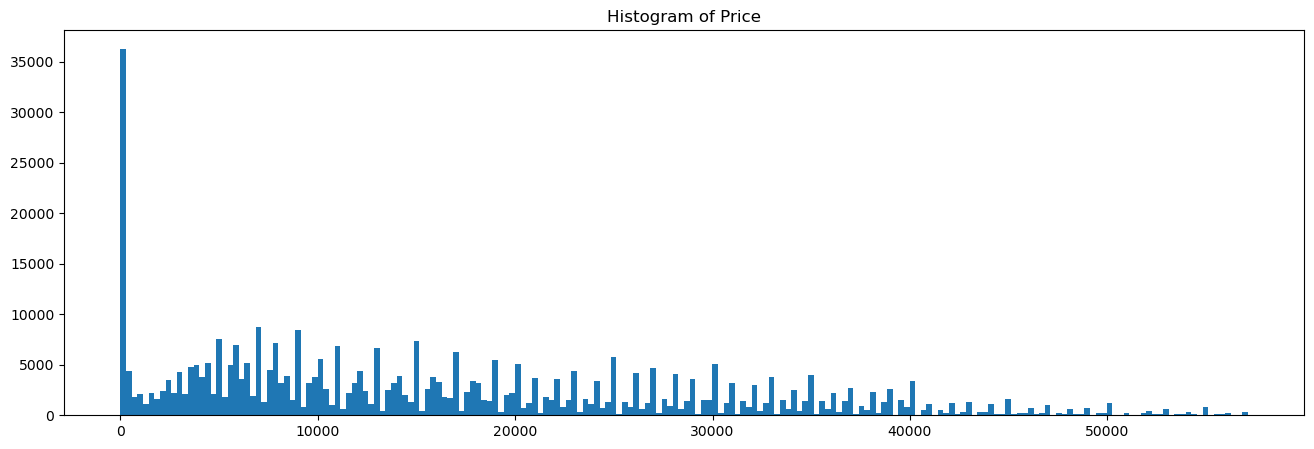

In [683]:
plt.figure(figsize=(16,5))
plt.hist(df_prep['price'], bins=200)
plt.title('Histogram of Price')
plt.show()

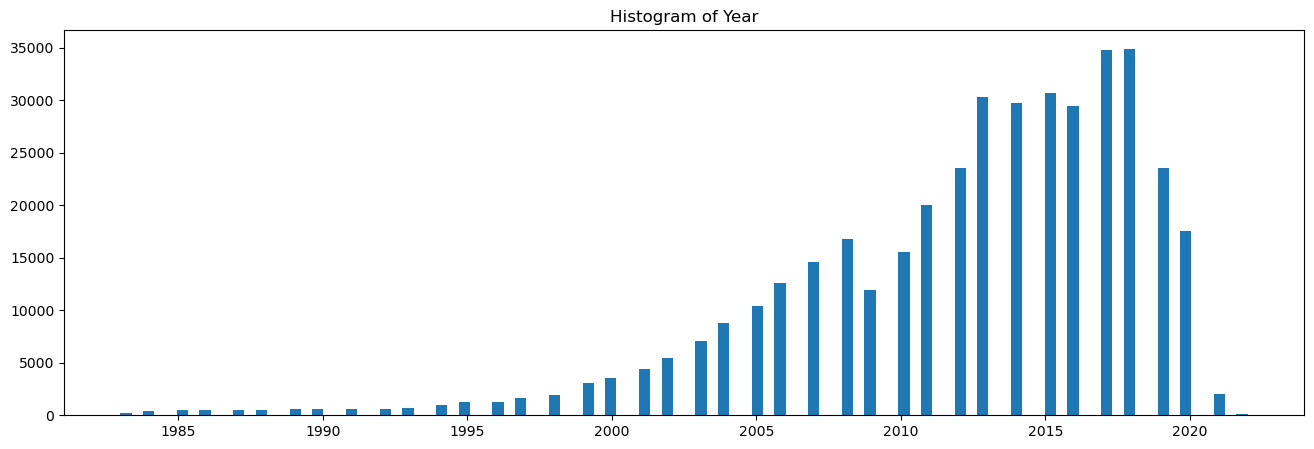

In [684]:
plt.figure(figsize=(16,5))
plt.hist(df_prep['year'], bins=100)
plt.title('Histogram of Year')
plt.show()

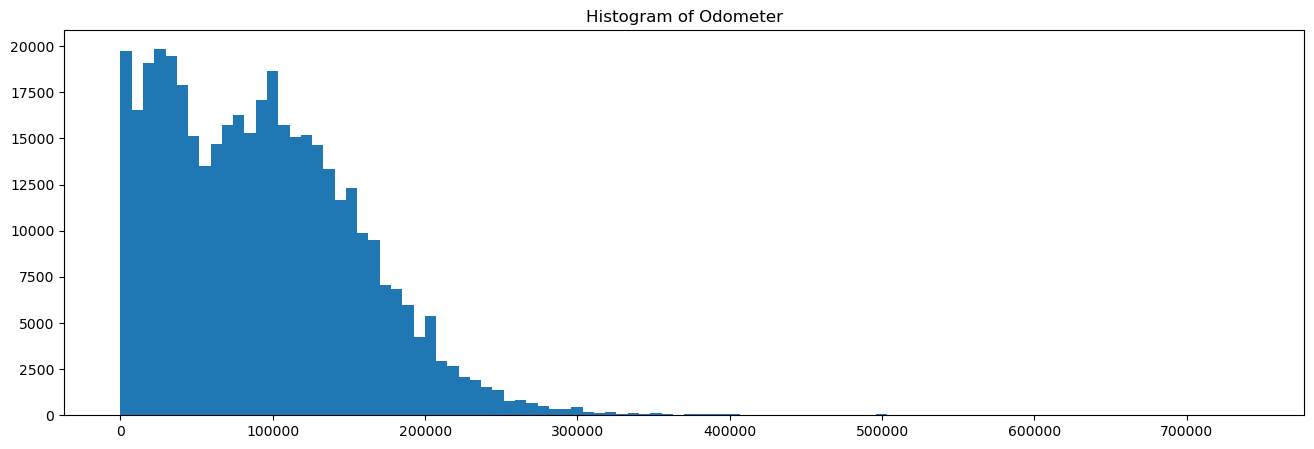

In [685]:
plt.figure(figsize=(16,5))
plt.hist(df_prep['odometer'], bins=100)
plt.title('Histogram of Odometer')
plt.show()

#### Code - create training and development endices and data sets

In [686]:
print(df_prep.shape[0] *0.1)
print(df_prep.shape[0] *0.1 * 0.8)

40392.700000000004
32314.160000000003


In [687]:
#Take part of data set and 80% of this part as training data
indices_all = range(0, len(df_prep))
indices_all = shuffle(indices_all)
indices_train, indices_dev, indices_rest = np.split(indices_all, [70000, 90000])
print(len(indices_train))
print(len(indices_dev))
print(len(indices_rest))

70000
20000
313927


In [688]:
df_prep_train = df_prep.iloc[indices_train]
df_prep_dev   = df_prep.iloc[indices_dev]

#### Code - encode categorical featues with OneHotEncoder

In [689]:
#List of columns used by OneHotEncoder
col_for_one_hot_encoder = ['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']


In [690]:
#For testing - use OneHotEncode on categorical featues
ohe = OneHotEncoder(sparse_output = False, drop='if_binary') 
df_prep_oho = pd.DataFrame(ohe.fit_transform(df_prep_train[col_for_one_hot_encoder]), columns=ohe.get_feature_names_out())

In [691]:
#We have now dataframe with 111 columns - encoder works
df_prep_oho.shape

(70000, 110)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Tasks
- Make regression model with only "year" and "odomter" features to determin degree - get mse and coeficients
- Make linear regression model with two numerical features and all categorical featues encoded but only subset of data used - determine mse and get best features
- Make Ridge regression model within GridSearchCV with 2 numerical features and all categorical featues encoded - determine mse and feature weights
- Make Lasso regression model within GridSearchCV with 2 numerical features and all categorical featues encoded - determine mse and feature weights

#### Notes and Conclusions
- Linear regression model was created with polynomial features “year” and “odometer” of degree 3. Got MSE of 122.544770*10^6. This MSE will be used as a base for comparison.
- Author used SequentialFeatureSelector to select 20 best features using Linear regression model with two numerical features and all categorical features encoded. Author also made some tests with less features and larger dataset. However, this size of features was optimal from performance standpoint (when using laptop). Only subset of data was used.  This model predicted that features “year” and “odometer” were the most important. Nex important feature was “manufacturer”, followed by some values from features “condition”, “cylinders”, “fuel”, transmission”, “drive” etc. From this model it was clear that if “year” increases, price also increases, if “odometer” decreases, price also decreases. Model valued less cars of these brands: “Doge”, “Hyndai”, “KIA”, “Nissan", “Volkswagen”. Model also gave negative coefficient for cars with 4 cylinders, cars with automatic transmission, cars with front wheel drive,  However, positive coefficient was given to cars with diesel fuel, cars with 8 cylinders, cars which are pickups. In this list there were no colors – so probably color is not the most important feature. Testing MSE was 94.0463*10^6.
- Author used GridSearchCV approach with Ridge and Lasso regression models. There were two separate tests. Lasso regression took more time and there were warnings regarding number of iterations. Both models were created using features “year” and “odometer” (first degree) and set of categorical features. Results from these two models are used to get main conclusions for car dealer.

#### Code - linear regression model with only "year" and "odomter" features to determine degree and mse

In [797]:
df_small = df_prep[['price', 'year', 'odometer']].copy()
X_small = df_small.drop('price', axis=1)
y_small = df_small['price']
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, test_size=0.3, random_state=22)

In [798]:
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin
    
    for i in range(1,11):
        pipe = Pipeline([
            ('pfeat', PolynomialFeatures(degree = i, include_bias = False)), 
            ('linreg', LinearRegression())
        ])
        pipe.fit(pd.DataFrame(X_train), y_train)
        test_preds = pipe.predict(pd.DataFrame(X_test))
        test_mse = mean_squared_error(test_preds, y_test)
        if (test_mse < best_mse):
            best_mse = test_mse
            best_pipe = pipe

    return best_pipe

In [799]:
best_model = simple_cross_validation(X_small_train, y_small_train, X_small_test, y_small_test)
best_model.get_params()

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=3, include_bias=False)),
  ('linreg', LinearRegression())],
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=3, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 3,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}

In [800]:
#Mean square error for model with only two parameters - "year" and "odometer" with degree 2
print(mean_squared_error(best_model.predict(X_small_test),y_small_test)/10**6)

122.54477082226937


In [801]:
print(best_model.named_steps['linreg'].coef_)

[-1.77408977e-02  1.04858061e+00 -3.55575484e+01 -1.17636039e-03
 -9.30444373e-07  1.18650425e-02  3.02523206e-07  6.12083445e-10
 -2.28483898e-13]


In [802]:
pd.DataFrame([best_model.named_steps['linreg'].coef_], columns=best_model.named_steps['pfeat'].get_feature_names_out())

,year,odometer,year^2,year odometer,odometer^2,year^3,year^2 odometer,year odometer^2,odometer^3
0,-0.017741,1.048581,-35.557548,-0.001176,-9.304444e-07,0.011865,3.025232e-07,6.120834e-10,-2.284839e-13


In [803]:
best_model.predict([[2010, 100000]])

C:\Users\Martins.MBIT\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([11816.25576836])

#### Code - linear regression model with two numerical features and all categorical featues encoded but only subset of data used - determine mse

In [808]:
#Create column transformer
column_transformer = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output = False, drop = 'if_binary'), col_for_one_hot_encoder), 
    remainder='passthrough'
)

In [809]:
#Create training and test sets
X_train = df_prep_train.drop('price', axis=1)
y_train = df_prep_train['price']
X_test = df_prep_dev.drop('price', axis=1)
y_test = df_prep_dev['price']

In [810]:
df_prep_train.shape

(70000, 13)

In [811]:
df_prep_dev.shape

(20000, 13)

In [812]:
#Get transformed training and test sets
X_train_transformed = pd.DataFrame(column_transformer.fit_transform(X_train), columns=column_transformer.get_feature_names_out())
X_test_transformed  = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())
X_train_transformed.head()

,standardscaler__year,standardscaler__odometer,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,...,onehotencoder__paint_color_custom,onehotencoder__paint_color_green,onehotencoder__paint_color_grey,onehotencoder__paint_color_orange,onehotencoder__paint_color_purple,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,onehotencoder__paint_color_nan
0,0.618092,-1.288035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.294320,0.251148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.294320,1.932821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.779978,-0.668746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.456206,-0.359394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [818]:
#Select best 20 featues
feature_selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=30)
X_train_best_features = pd.DataFrame(feature_selector.fit_transform(X_train_transformed, y_train), columns=feature_selector.get_feature_names_out())

In [819]:
X_test_best_features = pd.DataFrame(feature_selector.transform(X_test_transformed), columns=feature_selector.get_feature_names_out())

In [820]:
X_test_best_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   standardscaler__year                    20000 non-null  float64
 1   standardscaler__odometer                20000 non-null  float64
 2   onehotencoder__manufacturer_audi        20000 non-null  float64
 3   onehotencoder__manufacturer_dodge       20000 non-null  float64
 4   onehotencoder__manufacturer_hyundai     20000 non-null  float64
 5   onehotencoder__manufacturer_kia         20000 non-null  float64
 6   onehotencoder__manufacturer_lexus       20000 non-null  float64
 7   onehotencoder__manufacturer_mitsubishi  20000 non-null  float64
 8   onehotencoder__manufacturer_nissan      20000 non-null  float64
 9   onehotencoder__manufacturer_porsche     20000 non-null  float64
 10  onehotencoder__manufacturer_subaru      20000 non-null  fl

In [821]:
#Make a model with 20 best featues 
model = LinearRegression()
model.fit(X_train_best_features, y_train)

mse_train = mean_squared_error(model.predict(X_train_best_features), y_train)
mse_test = mean_squared_error(model.predict(X_test_best_features), y_test)

# Answer check
print(type(model))
print(model.coef_)
print()
print(f'Train MSE: {mse_train/10**6: .4f}')
print(f'Test MSE: {mse_test/10**6: .4f}')

<class 'sklearn.linear_model._base.LinearRegression'>
[ 4452.79564481 -2818.69044389  3406.38284893 -3573.04163018
 -3675.64400082 -4101.14817877  3697.47034374 -4868.60375812
 -3310.87340485  8366.85246222 -2041.30261655  9511.53444136
  1396.13890451 -2896.46104169  1498.10824159 -2170.78744274
  2416.21585613  8710.09700981  1922.22304751 -2397.19621555
  1919.44336768 -4702.40245167 -2876.16629877  1965.58522019
 -1531.46691372 -3912.70257598  3292.37090497 -2950.36261525
 -3037.60201501 -2455.08642278]

Train MSE:  92.5136
Test MSE:  91.8794


In [822]:
pd.DataFrame([model.coef_], columns=feature_selector.get_feature_names_out())

,standardscaler__year,standardscaler__odometer,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_dodge,onehotencoder__manufacturer_hyundai,onehotencoder__manufacturer_kia,onehotencoder__manufacturer_lexus,onehotencoder__manufacturer_mitsubishi,onehotencoder__manufacturer_nissan,onehotencoder__manufacturer_porsche,...,onehotencoder__transmission_other,onehotencoder__drive_fwd,onehotencoder__drive_nan,onehotencoder__size_nan,onehotencoder__type_SUV,onehotencoder__type_hatchback,onehotencoder__type_pickup,onehotencoder__type_sedan,onehotencoder__type_wagon,onehotencoder__paint_color_nan
0,4452.795645,-2818.690444,3406.382849,-3573.04163,-3675.644001,-4101.148179,3697.470344,-4868.603758,-3310.873405,8366.852462,...,1919.443368,-4702.402452,-2876.166299,1965.58522,-1531.466914,-3912.702576,3292.370905,-2950.362615,-3037.602015,-2455.086423


#### Code - Ridge regression model within GridSearchCV with 2 numerical features and all categorical featues encoded - determine mse and feature weights

In [706]:
#ridge_indices_train, ridge_indices_dev = np.split(indices_all, [335000])

scaled_ridge_model = Pipeline([
    ('column_transformer', column_transformer),
    ('ridge_regression', Ridge())
])

#parameters_to_try = {'ridge_regression__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6,10**7,10**8,10**9,10**10]}
parameters_to_try = {'ridge_regression__alpha': [10**4, 10**5, 10**6,10**7,10**8,10**9,10**10]}

ridge_model_finder = GridSearchCV(estimator = scaled_ridge_model,
                               param_grid = parameters_to_try,
                               scoring = "neg_mean_squared_error",
                               cv=5)

In [707]:
ridge_X_train = df_prep.drop('price', axis=1).copy()
ridge_y_train = df_prep['price']

In [708]:
ridge_model_finder.fit(ridge_X_train, ridge_y_train)

C:\Users\Martins.MBIT\AppData\Local\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000024389C93C80>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color'])])),
                                       ('ridge_regression', Ridge())]),
             param_grid={'ridge_regression__alpha': [10000, 100000, 1000000,
                                                     10000000, 100000000,
                                                     1000000000, 10000000000]},
             scoring='neg_mean_squared_error')

In [709]:
#ridge_model_finder.cv_results_

In [710]:
ridge_best_model = ridge_model_finder.best_estimator_
ridge_best_model

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024389D5F6E0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('ridge_regression', Ridge(alpha=10000))])

In [711]:
ridge_model_finder.best_params_

{'ridge_regression__alpha': 10000}

In [742]:
print(f"Dev MSE for our best Ridge Regression model: {-ridge_model_finder.best_score_/10**6}") #e4

Dev MSE for our best Ridge Regression model: 94.97758847434159


In [741]:
mean_squared_error(ridge_best_model.predict(ridge_X_train), ridge_y_train)/10**6

93.01858997412894

In [714]:
ridge_weights = pd.DataFrame([ridge_best_model.named_steps["ridge_regression"].coef_],
             columns = ridge_best_model.named_steps["column_transformer"].get_feature_names_out())

In [715]:
ridge_weights.melt().sort_values(by='value', ascending=False).head(5)

,variable,value
61,onehotencoder__fuel_diesel,4409.050025
0,standardscaler__year,4166.241169
95,onehotencoder__type_pickup,3133.132340
58,onehotencoder__cylinders_8 cylinders,2257.528363
78,onehotencoder__drive_4wd,2044.199121


#### Code - Lasso regression model within GridSearchCV with 2 numerical features and all categorical featues encoded - determine mse and feature weights

In [745]:
#lasso_indices_train, lasso_indices_dev = np.split(indices_all, [335000])

scaled_lasso_model = Pipeline([
    ('column_transformer', column_transformer),
    ('lasso_regression', Lasso(max_iter=5000))
])

parameters_to_try = {'lasso_regression__alpha': [0.01, 0.1, 1, 10, 10**2]}

lasso_model_finder = GridSearchCV(estimator = scaled_lasso_model,
                               param_grid = parameters_to_try,
                               scoring = "neg_mean_squared_error",
                               cv=5)

In [746]:
lasso_X_train = df_prep.drop('price', axis=1).copy()
lasso_y_train = df_prep['price']
#lasso_X_train = df_prep_train.drop('price', axis=1).copy()
#lasso_y_train = df_prep_train['price']

In [747]:
lasso_model_finder.fit(lasso_X_train, lasso_y_train)

C:\Users\Martins.MBIT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e+12, tolerance: 5.626e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Martins.MBIT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.471e+12, tolerance: 5.587e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Martins.MBIT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000024389C93C80>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color'])])),
                                       ('lasso_regression',
                                        Lasso(max_iter=5000))]),
             param_grid={'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [748]:
lasso_model_finder.best_estimator_.named_steps['lasso_regression'].coef_

array([ 4.36212998e+03, -2.78883233e+03,  2.62325666e+03,  5.10366504e+03,
       -0.00000000e+00,  4.00658931e+03,  1.48251386e+03, -7.81881575e+01,
        2.40462489e+03,  3.72863295e+02, -2.23944296e+03,  3.25216027e+03,
       -2.43767448e+03, -1.26617248e+04, -5.70015549e+03,  4.12676911e+02,
        1.67997984e+03, -5.12651161e+03, -0.00000000e+00, -2.97745729e+03,
        1.33161249e+03,  5.30245868e+03,  8.09646820e+02, -3.49294961e+03,
       -4.15841428e+03,  4.58592532e+03,  2.56236074e+03, -2.12297995e+03,
        1.53661891e+03, -2.26904000e+03, -5.28669194e+02, -4.05685148e+03,
       -0.00000000e+00, -2.72527378e+03, -2.77412431e+02,  9.87808519e+03,
        1.87455850e+03,  5.60928395e+03, -1.83858981e+03, -9.95492918e+02,
        1.31608932e+04,  2.00962687e+03, -2.24232322e+03,  3.10368335e+03,
       -3.02972306e+02,  4.35064446e+02, -9.02549691e+02,  1.78150308e+03,
        1.66489353e+03, -1.40808795e+03, -8.97380081e+02,  0.00000000e+00,
        1.20399758e+03,  

In [749]:
lasso_best_model = lasso_model_finder.best_estimator_
lasso_best_model


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002438A61DD60>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('lasso_regression', Lasso(alpha=0.1, max_iter=5000))])

In [750]:
lasso_model_finder.best_params_

{'lasso_regression__alpha': 0.1}

In [751]:
print(f"Dev MSE for our best Lasso Regression model: {-lasso_model_finder.best_score_/10**6}") #e4

Dev MSE for our best Lasso Regression model: 92.97822226437579


In [752]:
lasso_weights = pd.DataFrame([lasso_best_model.named_steps["lasso_regression"].coef_],
             columns = lasso_best_model.named_steps["column_transformer"].get_feature_names_out())

In [753]:
lasso_weights.melt().sort_values(by='value', ascending=False).head(5)

,variable,value
40,onehotencoder__manufacturer_tesla,13160.893160
35,onehotencoder__manufacturer_porsche,9878.085192
53,onehotencoder__cylinders_12 cylinders,9604.944493
61,onehotencoder__fuel_diesel,8422.291076
37,onehotencoder__manufacturer_rover,5609.283947


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Tasks
- Create data frame containing feature weights for Ridge and Lasso regression + number of records with this feature value
- Get understanding of most important features which contribute to price increase or decrease.

#### Code with comments bellow

In [754]:
lasso_weights_df = lasso_weights.melt().set_index('variable').rename(columns={'value':'lasso_weight'})
ridge_weights_df = ridge_weights.melt().set_index('variable').rename(columns={'value':'ridge_weight'})

In [755]:
#Copy of previous used transformer
column_transformer_2 = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output = False, drop = 'if_binary'), col_for_one_hot_encoder), 
    remainder='passthrough'
)

In [756]:
df_prep_transformed = pd.DataFrame(column_transformer_2.fit_transform(df_prep.drop('price', axis=1).copy()), columns=column_transformer_2.get_feature_names_out())
nonzero_counts = (df_prep_transformed != 0).sum()
df_prep_count = pd.DataFrame(nonzero_counts, columns=['value_count'])

In [837]:
#New data frame with weights and feature value count - used of analysis
weights_df = pd.concat([df_prep_count, ridge_weights_df, lasso_weights_df], axis=1, ignore_index=False)

In [838]:
weights_df.loc[['standardscaler__year','standardscaler__odometer']]

,value_count,ridge_weight,lasso_weight
standardscaler__year,403927,4166.241169,4362.129981
standardscaler__odometer,403927,-2803.951329,-2788.832333


In [839]:
weights_df[weights_df.index.str.startswith("onehotencoder__manufacturer")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__manufacturer_lexus,8101,1640.204890,4585.925320
onehotencoder__manufacturer_ram,17336,1480.240063,1874.558501
onehotencoder__manufacturer_audi,7295,1408.472258,4006.589311
onehotencoder__manufacturer_toyota,33489,1162.847529,2009.626873
onehotencoder__manufacturer_porsche,1198,1009.457544,9878.085192
onehotencoder__manufacturer_gmc,15555,947.726284,1679.979844
onehotencoder__manufacturer_rover,1942,819.036000,5609.283947
onehotencoder__manufacturer_jaguar,1908,757.491986,5302.458681
onehotencoder__manufacturer_acura,5918,740.744029,2623.256665
onehotencoder__manufacturer_tesla,776,662.528795,13160.893160


In [840]:
weights_df[weights_df.index.str.startswith("onehotencoder__condition")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__condition_good,117625,1189.007179,1781.503075
onehotencoder__condition_like new,20120,650.515031,1664.893530
onehotencoder__condition_salvage,519,-143.579431,-897.380081
onehotencoder__condition_new,1112,-240.416440,-1408.087947
onehotencoder__condition_excellent,96178,-255.626886,435.064446
onehotencoder__condition_nan,162501,-523.439121,0.000000
onehotencoder__condition_fair,5872,-676.460332,-902.549691


In [841]:
weights_df[weights_df.index.str.startswith("onehotencoder__cylinders")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__cylinders_8 cylinders,64599,2257.528363,2086.836802
onehotencoder__cylinders_6 cylinders,90947,392.752710,42.294376
onehotencoder__cylinders_12 cylinders,142,142.080716,9604.944493
onehotencoder__cylinders_10 cylinders,1371,120.400618,1203.997577
onehotencoder__cylinders_nan,167688,89.592965,0.000000
onehotencoder__cylinders_3 cylinders,626,-250.169281,-3191.636746
onehotencoder__cylinders_5 cylinders,1676,-253.719402,-2004.974462
onehotencoder__cylinders_other,1083,-381.307488,-3612.705092
onehotencoder__cylinders_4 cylinders,75795,-2117.159201,-2039.365432


In [842]:
weights_df[weights_df.index.str.startswith("onehotencoder__fuel")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__fuel_diesel,26009,4409.050025,8422.291076
onehotencoder__fuel_nan,2127,30.762981,2564.152744
onehotencoder__fuel_electric,1604,21.303251,-1456.061967
onehotencoder__fuel_hybrid,5112,-784.651108,-458.530746
onehotencoder__fuel_other,29445,-1269.784092,66.023262
onehotencoder__fuel_gas,339630,-2406.681057,-212.589898


In [843]:
weights_df[weights_df.index.str.startswith("onehotencoder__title_status")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__title_status_clean,384098,1270.443941,2268.941617
onehotencoder__title_status_lien,1334,435.221481,4475.568461
onehotencoder__title_status_missing,381,-80.378661,-317.633913
onehotencoder__title_status_parts only,137,-82.214862,-4204.119852
onehotencoder__title_status_rebuilt,7032,-412.166419,106.852097
onehotencoder__title_status_nan,7164,-503.930004,-0.000000
onehotencoder__title_status_salvage,3781,-626.975477,-1002.199296


In [844]:
weights_df[weights_df.index.str.startswith("onehotencoder__transmission")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__transmission_other,62025,1703.233475,1291.632621
onehotencoder__transmission_manual,20633,227.756342,0.228172
onehotencoder__transmission_nan,1623,-11.542578,-508.659407
onehotencoder__transmission_automatic,319646,-1919.447239,-2505.062164


In [845]:
weights_df[weights_df.index.str.startswith("onehotencoder__drive")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__drive_4wd,124850,2044.199121,2531.929830
onehotencoder__drive_rwd,52535,1346.377308,1964.359841
onehotencoder__drive_nan,123177,-580.073757,-60.073492
onehotencoder__drive_fwd,103365,-2810.502672,-1674.088852


In [846]:
weights_df[weights_df.index.str.startswith("onehotencoder__size")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__size_nan,289647,1598.650282,2267.040095
onehotencoder__size_sub-compact,2994,-185.781487,-143.440741
onehotencoder__size_mid-size,33372,-319.622387,306.907051
onehotencoder__size_full-size,59669,-395.114557,0.000000
onehotencoder__size_compact,18245,-698.131852,-192.994614


In [847]:
weights_df[weights_df.index.str.startswith("onehotencoder__type")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__type_pickup,40467,3133.132340,4038.072184
onehotencoder__type_truck,32512,1257.389222,1612.143740
onehotencoder__type_convertible,6542,959.097493,2394.511868
onehotencoder__type_coupe,16959,717.797358,1238.613939
onehotencoder__type_other,20761,681.409583,927.434034
onehotencoder__type_van,8220,210.478269,979.005477
onehotencoder__type_offroad,513,178.377744,3701.235059
onehotencoder__type_bus,482,-145.552405,-3106.350304
onehotencoder__type_nan,85877,-248.263193,-0.007546
onehotencoder__type_mini-van,4754,-274.141202,-236.036335


In [848]:
weights_df[weights_df.index.str.startswith("onehotencoder__paint_color")].sort_values(by='ridge_weight', ascending=False)

,value_count,ridge_weight,lasso_weight
onehotencoder__paint_color_black,59825,692.469578,327.458720
onehotencoder__paint_color_white,75442,666.598915,160.167884
onehotencoder__paint_color_custom,6218,391.911915,886.997194
onehotencoder__paint_color_red,28535,202.490603,32.529926
onehotencoder__paint_color_yellow,1744,139.035640,625.925838
onehotencoder__paint_color_purple,592,63.995229,1295.187873
onehotencoder__paint_color_green,6628,-3.199926,-0.000000
onehotencoder__paint_color_brown,6255,-6.347680,-254.341571
onehotencoder__paint_color_grey,23513,-28.181723,-234.355971
onehotencoder__paint_color_blue,29618,-65.827787,-281.654796


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Conclusions for car dealer:
1)	If year increases cars price also increases, if odometer number increases, cars price decreases.
2)	Clients value cars the most from these manufacturers – Lexus, RAM, Audi, Toyota, Porsche and GMC. Most sold cars were RAM, Toyota and GMC. There are also sold a lot of Ford, Jeep and Chevrolet cards. However, these type cars are not valued as expensive.
3)	Clients think that the least expensive models are from Nissan, Kia, Hyndai, Doge, Volkswagen, also Honda is valued low. Sales are not so big for these models also.
4)	Clients want cars which look good and are in “like new” condition. However, there is large part with cars with unknown condition which is a problem for data analysis in this case. One of tow main models also gave good mark for cars with excellent condition. 
5)	Clients value the most cars with larger engines – in particular, with 8 and 6 cylinders. Also, a lot of 4-cylinder cars are sold. However, these cars clients value as cheaper cars.
6)	Cars with diesel engines tend to be more expensive. Gas engine cars tend to be cheaper. However most of cars sold are gas engine cars. There is some demand for diesel cars but most of buyers choose gas. 
7)	Clients buy cars with clean status. They do not like anything else. These cars are more valuable from clients perspective.
8)	With transmission types there is the same situation as with fuel types – most of cars sold are automatic – they are cheaper as manual cars. However, cars with manual cars are sold in small numbers. 
9)	Cars with 4 wheel drive and rear wheel drive are valued as more expensive and also sell quite good. Front wheel drive cars tend to sell for cheaper prices but also in large quantities.
10)	It was not clear form data – what size cars are most preferred – it seems that clients like different size of cars in similar amount. Except sub-compact size cars are sold in smaller quantities. 
11)	Clients like pickups and trucks. These are valued as expensive. Also convertible cars and coupe cars are valued as expensive but are sold in small quantities. Clients also by SUVs and sedans. However, these cars tend to be cheaper and sold for less money. 
12)	Clients like black, white and red cars. These are sold in large quantities. Silver cars are also sold in large quantities (also as blue and grey). However, these tend to be cheaper.


#### Future tasks:
1) What would be the impact on sales numbers if the car stock were changed in a particular way? To analyse this, the author would need to obtain dealers’ current stock and sales data, model the changes in stock, and then make predictions about potential income.
2) Segmentation of the cars sold might also be useful. For example, identifying what types of cars—by mileage, year, and other attributes—are most valued by clients, as well as which clients value specific types of cars. It would also be important to estimate how many potential clients exist for these car segments.